In [58]:
import pandas as pd
import matplotlib.pyplot as plt

MODEL_SLUG = "DMC-1200m-shortTest-07-12-2023_00:06-WINNER"

distance = 400

base_rider = pd.read_csv(f"./data/testCourse-{distance}m-10:8-rider.csv")
model_rider = pd.read_csv("./data/testCourse-400m-DDQN-400m-testCourse-09-12-2023_17:47.csv")

base_rider_name = "10:8 Rider"
model_rider_name = "Model Rider"

In [59]:
print(f"{base_rider_name} time: {base_rider.shape[0]} seconds")
print(f"{model_rider_name} time: {model_rider.shape[0]} seconds")

10:8 Rider time: 62 seconds
Model Rider time: 63 seconds


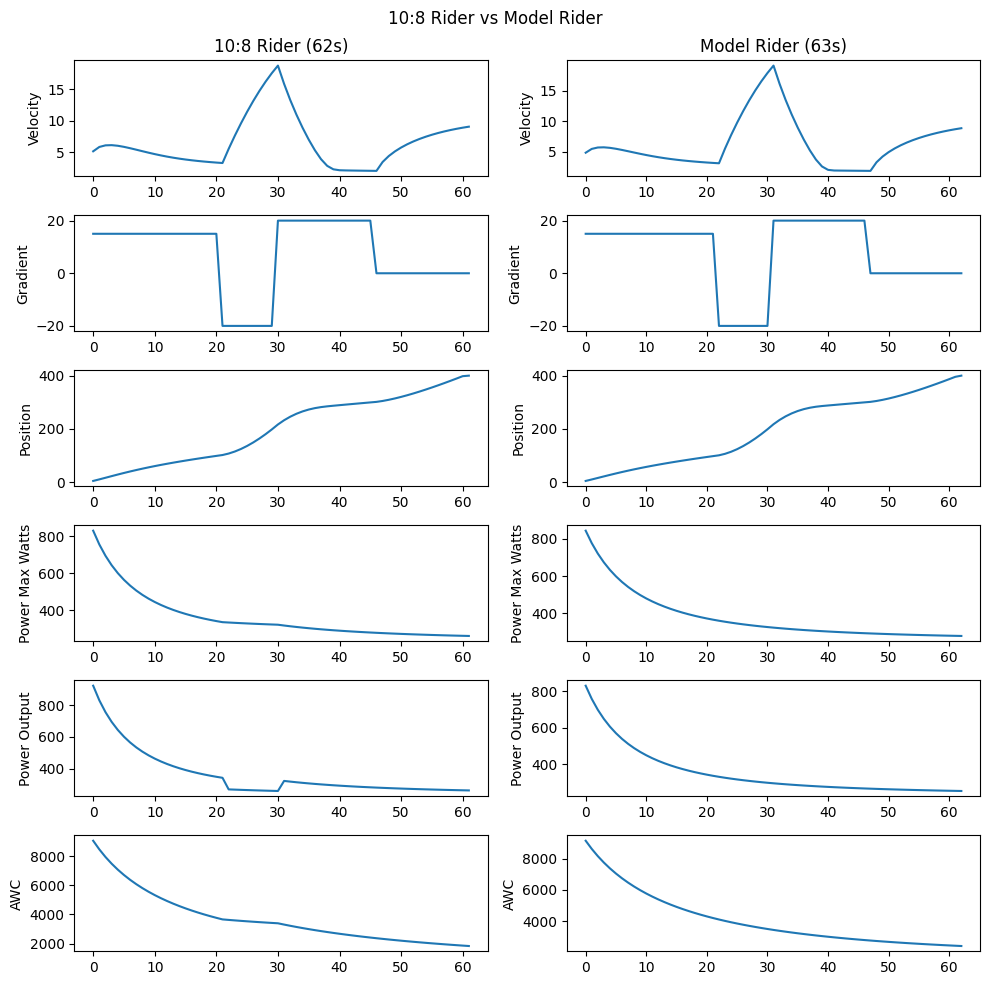

In [60]:
plt.rcParams['figure.figsize'] = [10, 10]

def plots(dfs: list, title: str = None, subplot_titles: list = None):

    fig, axs = plt.subplots(6, len(dfs))
    fig.suptitle(title)

    if len(dfs) == 1:
        axs = axs.reshape(6, 1)

    for i, df in enumerate(dfs):
        axs[0, i].plot(df.index, df['velocity'])
        axs[0, i].set_ylabel('Velocity')
        axs[0, i].set_title(subplot_titles[i])

        axs[1, i].plot(df.index, df['gradient'])
        axs[1, i].set_ylabel('Gradient')

        axs[2, i].plot(df.index, df['position'])
        axs[2, i].set_ylabel('Position')

        axs[3, i].plot(df.index, df['power_max_w'])
        axs[3, i].set_ylabel('Power Max Watts')

        axs[4, i].plot(df.index, df['power_agent_w'])
        axs[4, i].set_ylabel('Power Output')

        axs[5, i].plot(df.index, df['AWC'])
        axs[5, i].set_ylabel('AWC')

    plt.tight_layout()
    plt.show()

plots([base_rider, model_rider],
      f"{base_rider_name} vs {model_rider_name}",
      [f"{base_rider_name} ({base_rider.shape[0]}s)",
       f"{model_rider_name} ({model_rider.shape[0]}s)"])